# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist

- **Nama:** Fattahillah Muhammad Ilham Tarigan
- **Email:** fattah.tarigan@gmail.com
- **ID Dicoding:** fattahtrgn

## Pertanyaan Bisnis

- Berapa total jumlah dan nilai transaksi berdasarkan periode tertentu?
- Kategori produk apa yang paling populer dan berkontribusi terhadap nilai transaksi terbesar?
- Bagaimana performa penjual dan kontribusinya terhadap transaksi?
- Bagaimana perilaku dan demografi pelanggan yang kita miliki?

## Import Packages/Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from IPython.display import display

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
geolocation_df = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
translation_df = pd.read_csv('data/product_category_name_translation.csv')


In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Accessing Data

#### Menilai tabel `orders_df`

In [13]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Periksa tipe data dan jumlah data

In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


⚠️ Terdapat kesalahan tipe data untuk tanggal dan non-null count tidak sesuai entries, terdapat missing value

##### Periksa duplikasi dan ringkasan parameter statistik

In [15]:
print("Duplicated: ",orders_df.duplicated().any())

orders_df.describe()

Duplicated:  False


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak perlu periksa ringkasan parameter statistik karena tidak ada data numerik

##### Periksa unique value

In [16]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

#### Menilai tabel `order_items_df`

In [17]:
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


##### Periksa tipe data dan jumlah data

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


non-null count sesuai entries, tidak ada missing values  
⚠️ terdapat kesalahan tipe data datetime

##### Periksa duplikasi dan ringkasan parameter statistik

In [19]:
print("Duplicated: ",order_items_df.duplicated().any())

order_items_df.describe()

Duplicated:  False


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


⚠️Terdapat ongkir sebesar 0, berpotensi anomali

In [20]:
order_items_df[order_items_df['order_id'].duplicated(keep=False)].head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
42,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78


##### Periksa unique value

In [21]:
order_items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

#### Menilai tabel `order_payments_df`

In [22]:
order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


##### Periksa tipe data dan jumlah data

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### Periksa duplikasi dan ringkasan parameter statistik

In [24]:
print("Duplicated: ",order_payments_df.duplicated().any())

order_payments_df.describe()

Duplicated:  False


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


⚠️terdapat `payment_value` = 0 dan `payment_installments` = 0

##### Periksa unique value

In [25]:
order_payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

Terdapat order yang menggunakan beberapa metode pembayaran

#### Menilai tabel `order_reviews_df`

In [26]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Periksa tipe data dan jumlah data

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


⚠️**Terdapat missing value kesalahan tipe data tanggal**



##### Periksa duplikasi dan ringkasan parameter statistik

In [28]:
print("duplikasi: ", order_reviews_df.duplicated().any())

order_reviews_df.describe()

duplikasi:  False


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Periksa unique value

In [29]:
order_reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [30]:
order_reviews_df['review_id'].is_unique

False

In [31]:
order_reviews_df['review_id'].duplicated().sum()

np.int64(814)

In [32]:
order_reviews_df[order_reviews_df.duplicated(subset='review_id', keep=False)].sort_values(by='review_id').head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
57280,0174caf0ee5964646040cd94e15ac95e,74db91e33b4e1fd865356c89a61abf1f,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
54832,017808d29fd1f942d97e50184dfb4c13,8daaa9e99d60fbba579cc1c3e3bfae01,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
20621,0254bd905dc677a6078990aad3331a36,5bf226cf882c5bf4247f89a97c86f273,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44
96080,0254bd905dc677a6078990aad3331a36,331b367bdd766f3d1cf518777317b5d9,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44


#### Menilai tabel `customers_df`

At our system each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

In [33]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Periksa tipe data dan jumlah data

In [34]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


##### Periksa duplikasi dan ringkasan parameter statistik

In [35]:
print("Duplicated: ",customers_df.duplicated().any())

customers_df.describe()

Duplicated:  False


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


tidak ada zip code di luar Brazil (01000 - 99999)

##### Periksa unique value

In [36]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

customer_id unique sesusai entries
customer_unique_id tidak unique, terdapat repeat order

#### Menilai tabel `sellers_df`

In [37]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


##### Periksa tipe data dan jumlah data

In [38]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


##### Periksa duplikasi dan ringkasan parameter statistik

In [39]:
print("Duplicated: ",sellers_df.duplicated().any())

sellers_df.describe()

Duplicated:  False


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


tidak ada zip code di luar Brazil (01000 - 99999)

##### Periksa unique value

In [40]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

#### Menilai tabel `products_df`

In [41]:
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


##### Periksa tipe data dan jumlah data

In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


⚠️Terdapat missing values

##### Periksa duplikasi dan ringkasan parameter statistik

In [43]:
print("duplikasi: ", products_df.duplicated().any())

products_df.describe()

duplikasi:  False


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


terdapat produk yang memiliki berat 0g dan 40kg(sangat berat), juga dimensi sangat kecil hingga cukup besar.

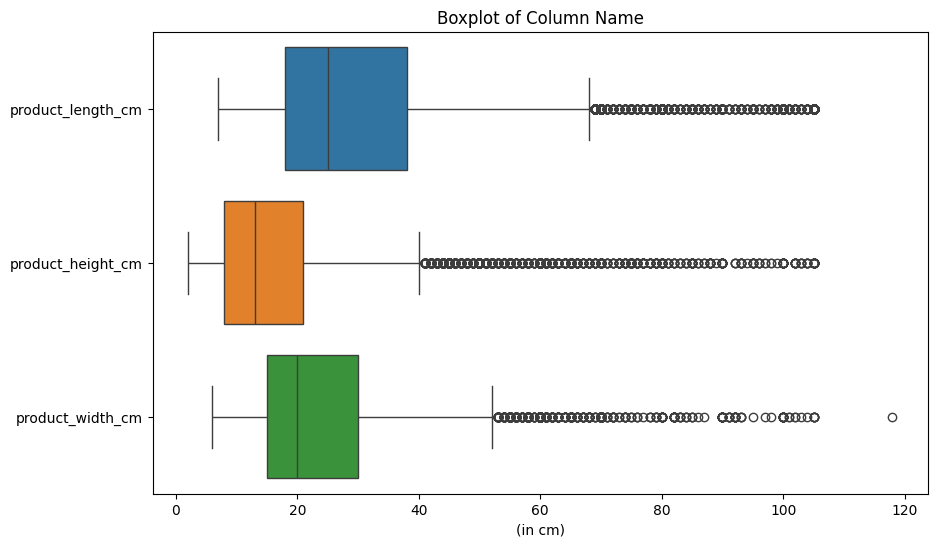

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=products_df[['product_length_cm', 'product_height_cm', 'product_width_cm']], orient = 'h')
plt.title('Boxplot of Column Name')
plt.xlabel('Columns')
# plt.xticks(rotation=30)
plt.xlabel('(in cm)')
plt.show()

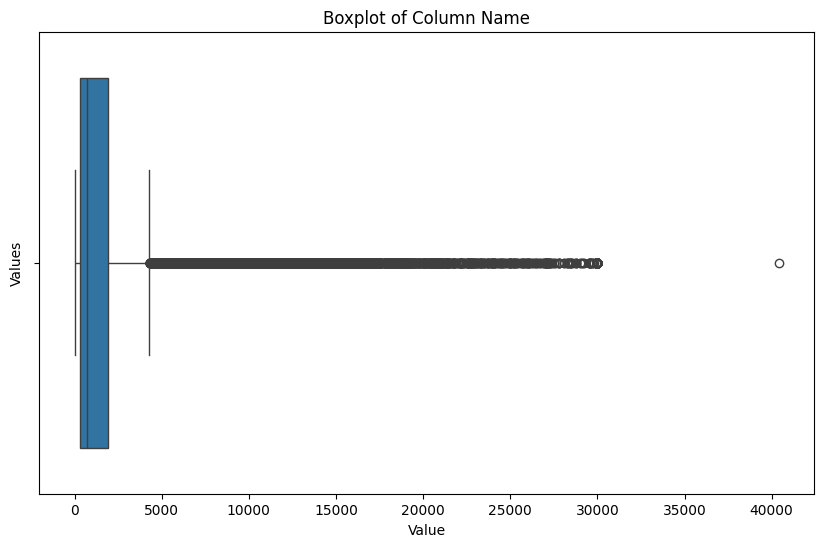

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=products_df['product_weight_g'], orient='h')
plt.title('Boxplot of Column Name')
plt.xlabel('Columns')
# plt.xticks(rotation=30)
plt.ylabel('Values')
plt.xlabel('Value')
plt.show()

In [46]:
products_df[(products_df['product_weight_g'] == 0) | (products_df['product_weight_g'] == 40425)]\
    .drop(['product_description_lenght', 'product_name_lenght', 'product_photos_qty'], axis=1)\
    .sort_values(by='product_weight_g')

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,0.0,30.0,25.0,30.0
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,40425.0,13.0,65.0,28.0


##### Periksa unique value

In [47]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [48]:
products_df['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

#### Menilai tabel `geolocation_df`

In [49]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### Menilai tipe data dan jumlah data

In [50]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


##### Periksa duplikasi dan ringkasan parameter statistik

In [51]:
print("Duplicated: ",geolocation_df.duplicated().any())

geolocation_df.describe()

Duplicated:  True


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


⚠️ Terdapat duplikasi  
  
tidak ada zip code di luar Brazil (01000 - 99999)

In [52]:
print(geolocation_df.duplicated().sum())

261831


##### Periksa unique value

In [53]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

#### Kesimpulan
- `orders_df`
  - Terdapat kesalahan tipe data untuk tanggal 
  - Terdapat missing value
- `order_items_df`
  - Terdapat kesalahan tipe data untuk tanggal
  - Terdapat **freight_value** = 0
- `order_payments_df`
  - Terdapat  **payment_installments** = 0 dan tedapat **payment_value** = 0 
- `order_review_df`
  - Terdapat kesalahan tipe data untuk tanggal
  - Terdapat missing value  
- `order_products_df`
  - Terdapat missing value
- `geolocation_df`
  - Terdapat duplikasi

### Cleaning Data

#### Membersihkan data `orders_df`

##### Handling kesalahan tipe data

In [54]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [55]:
time_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

orders_df[time_columns] = orders_df[time_columns].apply(pd.to_datetime, errors='coerce')

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Handling missing values

In [56]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

⚠️**Missing value pada time columns**

Asumsi: missing values terjadi karena status order di-cancel atau belum sampai

In [57]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [58]:
print(f"order_approved by {orders_df[orders_df['order_approved_at'].isnull()]['order_status'].value_counts()}")

print(f"\ndelivered_carrier by {orders_df[orders_df['order_delivered_carrier_date'].isnull()]['order_status'].value_counts()}")

print(f"\ndelivered_customer by {orders_df[orders_df['order_delivered_customer_date'].isnull()]['order_status'].value_counts()}")

order_approved by order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

delivered_carrier by order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

delivered_customer by order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


In [59]:
null_cols = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

orders_df[
    (orders_df['order_status'] == 'canceled') & (orders_df[null_cols].notnull().all(axis=1))
    ][['order_id'] + null_cols]

,order_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
2921,1950d777989f6a877539f53795b4c3c3,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51
8791,dabf2b0e35b423f94618bf965fcb7514,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59
58266,770d331c84e5b214bd9dc70a10b829d0,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11
59332,8beb59392e21af5eb9547ae1a9938d06,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43
92636,65d1e226dfaeb8cdc42f665422522d14,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50


In [60]:
orders_df[
    (orders_df['order_status'] == 'canceled') & (
        (orders_df[null_cols[0]].isnull() & orders_df[null_cols[1:]].notnull().any(axis=1)) |
        (orders_df[null_cols[:2]].isnull().all(axis=1) & orders_df[null_cols[2]].notnull())
    )
    ][['order_id'] + null_cols]

,order_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date


Untuk _canceled_, cancel bisa terjadi pada proses status apa saja, dan stastus _canceled_ aman   
Untuk status lainnya juga aman, karena wajar jika belum memikili data pada kolom tersebut  
Untuk _delivered_, ini anomali karena seharusnya barang yang sudah sampai sudah ada datanya

In [61]:
anomalies = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1))
]

In [62]:
anomalies[['order_purchase_timestamp'] + null_cols]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
3002,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT
5323,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33
16567,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06
19031,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38
20618,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT
22663,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47
23156,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19
26800,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01
38290,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58
39334,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23


Null values pada kolom **order_delivered_customer_date** yang berstatus _delivered_ akan saya imputasi

In [63]:
orders_time_interval = pd.DataFrame({
    'order_id': orders_df['order_id'],
    'approval_time': (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 86400,
    'delivered_carrier_time': (orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 86400,
    'delivery_time': (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 86400,
    'estimated_time': (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.total_seconds() / 86400
})

orders_time_interval.describe()

,approval_time,delivered_carrier_time,delivery_time,estimated_time
count,99281.000000,97658.000000,96476.000000,99441.000000
mean,0.434129,3.234050,12.558702,23.767650
std,1.084917,3.611996,9.546530,8.832371
min,0.000000,-171.212419,0.533414,1.648993
25%,0.008958,1.128967,6.766403,18.331690
50%,0.014306,2.204676,10.217755,23.240370
75%,0.607535,4.071777,15.720327,28.424861
max,187.882523,125.775521,209.628611,155.135463


Terdapat inverval waktu **delivered_carrier_time** yang bernilai negatif, tetapi tidak masalah karena saya hanya akan imputasi di kolom **order_delivered_customer_date**

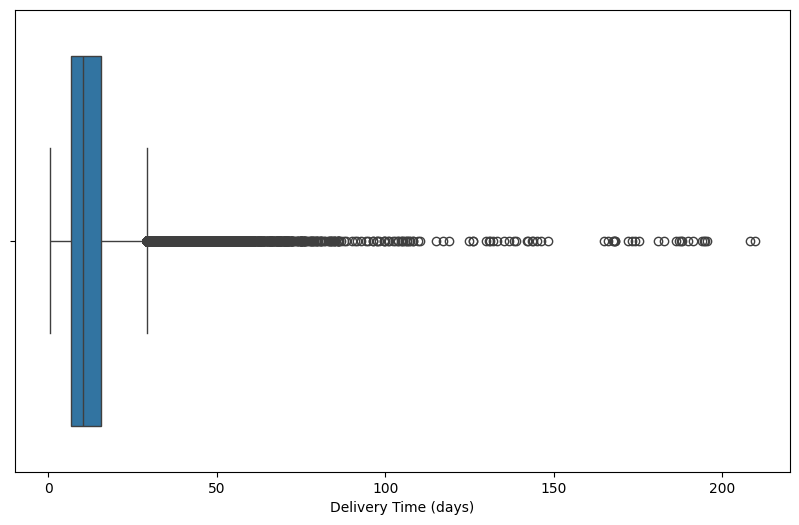

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=orders_time_interval['delivery_time'])
plt.xlabel('Delivery Time (days)')
plt.show()

Saya akan menggunakan median untuk imputasi di kolom **order_delivered_customer_date** agar tidak terpengaruh oleh outliers / nilai ekstrem

In [65]:
orders_time_interval.delivery_time.median()

np.float64(10.21775462962963)

In [66]:
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isnull()), 'order_delivered_customer_date'
] = orders_df['order_purchase_timestamp'] + pd.Timedelta(days=orders_time_interval.delivery_time.median())

In [67]:
orders_df[(orders_df['order_status'] == 'delivered')]['order_delivered_customer_date'].isnull().sum()

np.int64(0)

In [68]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [69]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96484 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [70]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Membersihkan data `order_items_df`

##### Handling kesalahan tipe data

In [71]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [72]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

##### Handling zero values

In [73]:
print(f"{(order_items_df['freight_value'] == 0).sum()} | {(order_items_df['freight_value'] == 0).sum() / order_items_df.shape[0] * 100:.2f}%")

383 | 0.34%


Asumsi: transaksi dengan ongkir 0 sebanyak 383 dan mencakup sekitar 0.34% dari total transaksi, mungkin ini normal karena disebabkan oleh promo atau voucher.  
Data dianggap valid dan tidak memerlukan penanganan lebih lanjut

#### Membersihkan data `order_payments_df` 

##### Handling zero values di **payment_value**

In [74]:
order_payments_df[order_payments_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [75]:
order_payments_df[order_payments_df['order_id'].isin(['8bcbe01d44d147f901cd3192671144db','4637ca194b6387e2d538dc89b124b0ee'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
5163,8bcbe01d44d147f901cd3192671144db,3,voucher,1,6.25
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
63762,8bcbe01d44d147f901cd3192671144db,2,voucher,1,31.70


In [76]:
order_items_df[order_items_df['order_id'].isin(['8bcbe01d44d147f901cd3192671144db','4637ca194b6387e2d538dc89b124b0ee'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61321,8bcbe01d44d147f901cd3192671144db,1,85d4c1a46f08f730de651ea6f6645313,3d871de0142ce09b7081e2b9d1733cb1,2018-01-30 23:37:20,59.0,15.16


Semua **payment_value** yang bernilai 0 tidak berarti apa apa, akan di-drop

In [77]:
order_payments_df.drop(order_payments_df[order_payments_df['payment_value'] == 0].index, inplace=True)


In [78]:
order_payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5769
debit_card      1529
Name: count, dtype: int64

##### Handling zero values di **payment_installments**

In [79]:
(order_payments_df['payment_installments'] == 0).sum()

np.int64(2)

In [80]:
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


Hanya ada 2 baris yang meemiliki nilai 0 di kolom **payment_installments**, dan keduanya menggunakan **payment_type** credit_card  
Asumsi: mungkin maksudnya 1 karena bayar sekali lunas

In [81]:
order_payments_df[order_payments_df['payment_installments'] > 1]['payment_type'].value_counts()

payment_type
credit_card    51338
Name: count, dtype: int64

**payment_installments** yang lebih dari sekali hanya terdapat pada tipe pembayaran dengan _credit_card_, tetapi cicilan 0 kali tidak masuk akal karena minimal terjadi 1 kali transaksi, maka **payment_installments** yang bernilai 0 akan diganti 1

In [82]:
order_payments_df.loc[(order_payments_df['payment_installments'] == 0), 'payment_installments'] = 1

order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103877.000000,103877.000000,103877.000000
mean,1.092340,2.853529,154.113732
std,0.704312,2.687095,217.498755
min,1.000000,1.000000,0.010000
25%,1.000000,1.000000,56.820000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


#### Membersihkan data `order_reviews_df`

##### Handling kesalahan tipe data

In [83]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [84]:
time_columns = [
    'review_creation_date', 
    'review_answer_timestamp'
]

order_reviews_df[time_columns] = order_reviews_df[time_columns].apply(pd.to_datetime, errors='coerce')

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Handling missing values

In [85]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

null value di `review_comment_title` dan `review_comment_message` wajar karena customer memberikan rating tanpa komentar adalah hal biasa   
Data valid

#### Membersihkan data `products_df`

##### Handling missing value

In [86]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [87]:
products_df[products_df[
    ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().all(axis=1)].shape[0]

1

Terdapat 1 baris yang semua kolomnya memiliki missing value

In [88]:
products_df[products_df[['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']]\
    .isnull().all(axis=1)].shape[0]

610

Semua 610 baris dengan nilai null di kolom **product_category_name**, **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty**  berada di baris yang sama.


In [89]:
products_df[products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]\
    .isnull().all(axis=1)].shape[0]

2

Semua nilai null di kolom **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm** juga berada di baris yang sama.


**Analisis produk di tabel `order_items_df`**

In [90]:
order_item_missing = order_items_df[order_items_df['product_id'].isin(products_df[products_df['product_category_name'].isna()]['product_id'])]

order_item_missing.product_id.value_counts()

product_id
5a848e4ab52fd5445cdc07aab1c40e48    197
b1d207586fca400a2370d50a9ba1da98     48
76d1a1a9d21ab677a61c3ae34b1b352f     32
3b60d513e90300a4e9833e5cda1f1d61     29
ad88641611c35ebd59ecda07a9f17099     29
                                   ... 
d4959e4f53f19c94abec965e966c7ca9      1
47ac3d02c68a76bc97b3b305f6e1192f      1
bcc4b932676146a860f295538caaff09      1
b5d652cabeb01249ad1cf910eef3230b      1
3895c3901baeb3589ea9acd2ded5e2a4      1
Name: count, Length: 610, dtype: int64

In [91]:
order_item_missing.product_id.value_counts().describe()

count    610.000000
mean       2.627869
std        8.749809
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      197.000000
Name: count, dtype: float64

ke 610 produk berada di tabel `order_items_df`. Beberapa item cukup banyak yang dipesan walaupun sebagian hanya dipesan 1 sampai 2 kali.  Mungkin produk dengan kolom **product_category_name**, **product_name_lenght**, **product_description_lenght**, dan **product_photos_qty** null karena produk sudah dihapus.  


Tetapi data ini cukup penting untuk analisis transaksi dan tidak akan dihapus.

Karena fokus analisis ke transaksi, maka null value akan dibiarkan data dianggap valid

In [92]:
products_df[products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]\
    .isnull().all(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena fokus analisis ke transaksi, maka dimensi produk tidak akan berpengaruh dan akan dibiarkan valid

#### Membersihkan data `geolocation_df`

##### Handling duplicated data

In [93]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [94]:
geolocation_df.drop_duplicates(inplace=True)

geolocation_df.duplicated().sum()

np.int64(0)

## EDA

### Explore `orders_df`

In [95]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96484 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [96]:
orders_df.sort_values('order_purchase_timestamp', inplace=True)

orders_df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25
93285,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
97979,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29
88472,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23


##### Distribusi **order_status**

In [97]:
orders_df['order_status'].value_counts().reset_index()

,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [98]:
total_orders = len(orders_df)
canceled_orders = orders_df[orders_df['order_status'] == 'canceled'].shape[0]


cancellation_rate = (canceled_orders / total_orders) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 0.63%


order yang di-cancel berjumlah 0.63% dari keseluruhan transaksi

##### Fokus pada transaksi yang berstatus **delivered**

In [99]:
delivered_orders_df = orders_df[orders_df['order_status']=='delivered']

#### Menambahkan kolom waktu pengiriman dan gap antara estimasi dengan waktu sebenarnya

In [100]:
delivered_orders_df['delivery_time'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['order_purchase_timestamp']) / (np.timedelta64(1, 'D'))
delivered_orders_df['delivery_gap'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['order_estimated_delivery_date']) / (np.timedelta64(1, 'D'))

C:\Users\Asus\AppData\Local\Temp\ipykernel_14976\3795551658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders_df['delivery_time'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['order_purchase_timestamp']) / (np.timedelta64(1, 'D'))
C:\Users\Asus\AppData\Local\Temp\ipykernel_14976\3795551658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders_df['delivery_gap'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['or

In [101]:
delivered_orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_gap
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,54.813194,36.324745
93285,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,23.178738,-0.415127
28424,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,24.057500,-10.236366
97979,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,30.572581,-25.542975
88472,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,27.542813,-22.536319


In [102]:
delivered_orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_gap
count,96478,96478,96478,96478,96464,96476,96478,96478,96478.000000,96478.000000
unique,96478,96478,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:29:31.939913216,2018-01-02 10:53:23.338011904,2018-01-05 05:01:50.912330496,2018-01-14 12:53:05.129345536,2018-01-25 17:09:52.325711616,12.558023,-11.178324
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.533414,-146.016123
25%,NaN,NaN,NaN,2017-09-14 09:00:23.249999872,2017-09-14 14:48:54,2017-09-18 16:46:13.249999872,2017-09-25 22:18:14.500000,2017-10-05 00:00:00,6.766464,-16.244117
50%,NaN,NaN,NaN,2018-01-20 19:45:45,2018-01-22 13:50:04,2018-01-24 16:13:47.500000,2018-02-02 19:41:06,2018-02-16 00:00:00,10.217755,-11.948102
75%,NaN,NaN,NaN,2018-05-05 18:54:47,2018-05-06 10:57:24.750000128,2018-05-08 14:35:00,2018-05-15 23:09:25.750000128,2018-05-28 00:00:00,15.719797,-6.390220
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.628611,188.975081


<Axes: >

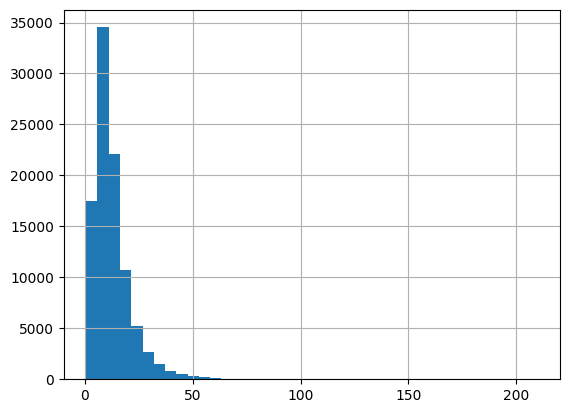

In [103]:
delivered_orders_df.delivery_time.hist(bins=40)

<Axes: >

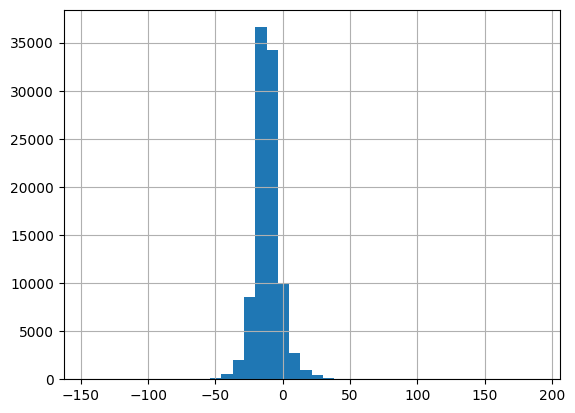

In [104]:
delivered_orders_df.delivery_gap.hist(bins=40)

In [105]:
delivered_orders_df['delivery_status'] = delivered_orders_df['delivery_gap'].apply(
    lambda x: 'Late' if x > 0 else 'On-time'
)
delivered_orders_df.delivery_status.value_counts().reset_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14976\1578490675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders_df['delivery_status'] = delivered_orders_df['delivery_gap'].apply(


,delivery_status,count
0,On-time,88652
1,Late,7826


In [106]:
late_rate = len(delivered_orders_df[delivered_orders_df['delivery_status']=='Late'])/len(delivered_orders_df)*100

print(f"Late Rate: {late_rate:.2f}%")

Late Rate: 8.11%


Sebesar 8.11  pengiriman mengalami keterlambatan

### Explore `order_items_df`

In [107]:
order_items_df.sample(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
15182,22959002637f051e9409b93827d07973,1,a1f36b00f1b14c2f4a0b816e592a94a4,dfc5fb7259bb2b599ca565e6e9448f0f,2018-04-25 18:30:50,184.99,9.65
97669,dd95d0db9c5b772bb855486678dc8a87,1,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2018-02-13 19:29:55,49.90,13.37
45358,67125a02929ae733f8087641f22c6842,1,480be8d20c4b6a7df1eae0f2c17f2db2,41c2bad7229b0c25e6becf179ebf63ff,2018-01-11 04:16:39,34.00,8.27
29011,42006f4285a74fe6aeef976170d01e60,2,f517e42dd0e3a8d6797dbd1010416447,4b0fdb526525f9890eb145bf1534640e,2018-08-24 16:05:21,159.90,40.20
12526,1c6380dc10ebea9bad618eb25fedcdfa,1,35310457211638bcf0670da2cd8ba8be,da6a60cc8cc724fe51be021ff8be779c,2018-08-02 01:10:08,44.90,19.50


#### Update tabel `order_items_df`

In [108]:
# Update tabel berdasarkan produk per transaksi
order_items_df_updated = order_items_df.groupby(['order_id','product_id','seller_id','shipping_limit_date']).agg(
    quantity = ('order_item_id' , 'count'),
    price_per_item = ('price' , 'mean'),
    freight_value = ('freight_value' , 'sum')
).reset_index()

order_items_df_updated['total_price'] = order_items_df_updated['quantity'] * order_items_df_updated['price_per_item']
order_items_df_updated['total_value'] = order_items_df_updated['total_price'] + order_items_df_updated['freight_value']

order_items_df_updated = order_items_df_updated[
    ['order_id', 'product_id', 'seller_id', 'quantity', 'price_per_item', 
     'total_price', 'freight_value','total_value', 'shipping_limit_date']
]

order_items_df_updated

,order_id,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,58.90,58.90,13.29,72.19,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90,239.90,19.93,259.83,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,199.00,199.00,17.87,216.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,12.99,12.99,12.79,25.78,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,199.90,199.90,18.14,218.04,2017-02-13 13:57:51
...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,299.99,299.99,43.41,343.40,2018-05-02 04:11:01
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,350.00,350.00,36.53,386.53,2018-07-20 04:31:48
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,99.90,99.90,16.95,116.85,2017-10-30 17:14:25
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,55.99,55.99,8.72,64.71,2017-08-21 00:04:32


In [109]:
order_items_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   product_id           102425 non-null  object        
 2   seller_id            102425 non-null  object        
 3   quantity             102425 non-null  int64         
 4   price_per_item       102425 non-null  float64       
 5   total_price          102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
 7   total_value          102425 non-null  float64       
 8   shipping_limit_date  102425 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 7.0+ MB


In [110]:
order_items_df_updated.describe(include='all')

,order_id,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date
count,102425,102425,102425,102425.000000,102425.000000,102425.000000,102425.000000,102425.000000,102425
unique,98666,32951,3095,NaN,NaN,NaN,NaN,NaN,NaN
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,467,1982,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.099829,124.422006,132.698498,21.985936,154.684435,2018-01-07 12:56:20.101556992
min,NaN,NaN,NaN,1.000000,0.850000,0.850000,0.000000,7.280000,2016-09-19 00:15:34
25%,NaN,NaN,NaN,1.000000,40.000000,44.900000,13.520000,60.000000,2017-09-20 03:05:47
50%,NaN,NaN,NaN,1.000000,78.800000,81.000000,16.850000,101.600000,2018-01-26 10:57:22
75%,NaN,NaN,NaN,1.000000,139.000000,147.900000,23.260000,170.190000,2018-05-10 15:50:40
max,NaN,NaN,NaN,20.000000,6735.000000,13440.000000,1794.960000,13664.080000,2020-04-09 22:35:08


In [111]:
order_items_df_updated.groupby('product_id').order_id.count().sort_values(ascending=False).reset_index()

,product_id,order_id
0,99a4788cb24856965c36a24e339b6058,467
1,aca2eb7d00ea1a7b8ebd4e68314663af,431
2,422879e10f46682990de24d770e7f83d,352
3,d1c427060a0f73f6b889a5c7c61f2ac4,323
4,389d119b48cf3043d311335e499d9c6b,311
...,...,...
32946,fff28f91211774864a1000f918ed00cc,1
32947,fff1059cd247279f3726b7696c66e44e,1
32948,ffeb228c521d5464d1f71444da96c446,1
32949,ffe9468f4d890db80b7231e86931ff37,1


In [112]:
order_items_df_updated.groupby('product_id').quantity.sum().sort_values(ascending=False).reset_index()

,product_id,quantity
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,ffd7628b0b0b98ebc549e8e4c54a59af,1
32947,ffd63ee42a5c8cc5a15a1c8e2aa50011,1
32948,002959d7a0b0990fe2d69988affcbc80,1
32949,002552c0663708129c0019cc97552d7d,1


In [113]:
order_items_df_updated[order_items_df_updated.order_id.duplicated(keep=False)]

,order_id,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date
73,002f98c0f7efd42638ed6100ca699b42,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,1,44.90,44.90,7.16,52.06,2017-08-10 09:30:15
74,002f98c0f7efd42638ed6100ca699b42,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,1,8.99,8.99,32.57,41.56,2017-08-10 09:30:15
83,00337fe25a3780b3424d9ad7c5a4b35e,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,1,59.90,59.90,9.94,69.84,2017-09-29 17:50:16
84,00337fe25a3780b3424d9ad7c5a4b35e,1f9799a175f50c9fa725984775cac5c5,cfb1a033743668a192316f3c6d1d2671,1,59.90,59.90,9.94,69.84,2017-09-29 17:50:16
136,005d9a5423d47281ac463a968b3936fb,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,2,24.99,49.98,27.16,77.14,2017-10-24 12:28:16
...,...,...,...,...,...,...,...,...,...
102321,ffb9a9cd00c74c11c24aa30b3d78e03b,fec565c4e3ad965c73fb1a21bb809257,da8622b14eb17ae2831f4ac5b9dab84a,2,89.90,179.80,36.68,216.48,2017-03-22 17:20:21
102332,ffc16cecff8dc037f60458f28d1c1ba5,241e398aacc909372622952b2ec6f954,de23c3b98a88888289c6f5cc1209054a,1,179.90,179.90,10.03,189.93,2017-11-27 19:34:24
102333,ffc16cecff8dc037f60458f28d1c1ba5,7c1043bb5837db0c6bc1953419a18628,de23c3b98a88888289c6f5cc1209054a,1,169.90,169.90,10.04,179.94,2017-11-27 19:34:24
102354,ffd543c2b60842e148a86870dc60e212,3ce943997ff85cad84ec6770b35d6bcd,9c0e69c7bf2619675bbadf47b43f655a,1,175.90,175.90,7.15,183.05,2018-01-11 02:35:33


### Explore `order_payments_df`

In [114]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
78003,924002999673a9f3811a42bfd72f0ed4,1,credit_card,1,147.15
98853,d2f452ea9e0c96f9005879a9fe3e3cba,1,boleto,1,76.08
64170,bbf6a647ecc68aa5e79d2cd75ef44c68,1,credit_card,4,46.84
98211,19482dab7e55b687df4b2aec7bf23f55,1,credit_card,4,198.04
8938,082e1d9362de402518ac4c47b4d82dd0,1,boleto,1,58.17


#### Distribusi **payment_type** & **payment_sequential**

In [115]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103877,103877.000000,103877,103877.000000,103877.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,27,NaN,76795,NaN,NaN
mean,NaN,1.092340,NaN,2.853529,154.113732
std,NaN,0.704312,NaN,2.687095,217.498755
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.820000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


In [116]:
order_payments_df.payment_type.value_counts(normalize=True).mul(100).round(2).reset_index(name='percentage')

,payment_type,percentage
0,credit_card,73.93
1,boleto,19.05
2,voucher,5.55
3,debit_card,1.47


Mayoritas pembayaran dilakukan dengan tipe credit card (hampir mencapai 75%)

In [117]:
order_payments_df.groupby('order_id').payment_sequential.count().value_counts().sort_index()

payment_sequential
1     96476
2      2383
3       303
4       105
5        52
6        36
7        28
8        11
9         9
10        5
11        8
12        8
13        3
14        2
15        2
19        2
21        1
22        1
26        1
27        1
Name: count, dtype: int64

#### Distribusi **payment_installment** (untuk *credit_card*)

In [118]:
order_payments_df[order_payments_df['payment_type']=='credit_card'].payment_installments.value_counts().sort_index()

payment_installments
1     25457
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

<Axes: >

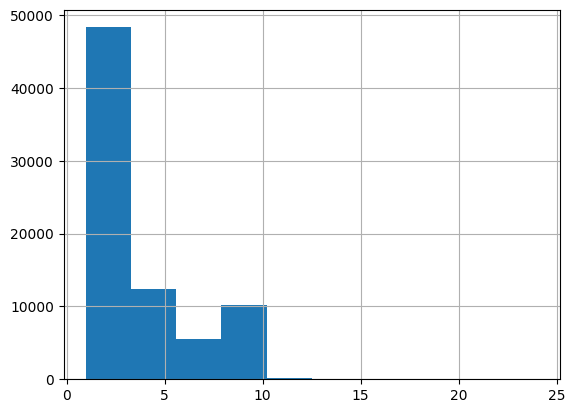

In [119]:
order_payments_df[order_payments_df['payment_type']=='credit_card'].payment_installments.hist()

#### Update tabel order_payments_df

untuk menghindari many-to-many merge

In [120]:
order_payments_df.sample()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
78317,2f2a34292298ceb3802f19528c621d87,1,credit_card,3,278.43


In [121]:
order_payments_df_updated = order_payments_df.groupby('order_id').agg(
    payment_count= ('payment_sequential', 'count'),
    payment_value= ('payment_value', 'sum')
)

order_payments_df_updated

,payment_count,payment_value
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,259.83
000229ec398224ef6ca0657da4fc703e,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,116.85


### Explore Order_reviews_df

In [122]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
76793,cc4fcaa2bb678f5be1df722d92bc2b52,c2be7debb550baab4fd6d03532387414,4,NaN,Enviou dentro do prazo e bem embalado.,2018-02-07,2018-02-07 18:36:32
82212,4f2c1fb7a602823e69511c8bbc7e5a67,ad4725342567809f8d0b8230394585d1,4,NaN,NaN,2018-07-03,2018-07-04 01:29:16
70102,83a49dab3ad5ce82673c8dd8f24a8d16,644c9c6187a3cad1f1102c0c6715b094,1,NaN,NaN,2017-11-12,2017-11-12 11:29:02
68301,91d9ce772e906ec0a356441425a9e45f,c619ac0f9cdcfcebdfb9490451166da4,3,NaN,NaN,2017-06-13,2017-06-14 18:00:27
90739,827250b49c78f6f50c2ede907e903da6,c22f4f00d48f26a217d8f07c7653b588,4,Recomendo,"A qualidade ainda não foi testada, mas em mãos...",2018-07-11,2018-07-14 13:30:34


In [123]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [124]:
order_reviews_df[order_reviews_df['order_id']=='2e7a8482f6fb09756ca50c10d7bfc047']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
74443,cef1ee03ded4d6272894a2eead6e1328,2e7a8482f6fb09756ca50c10d7bfc047,1,NaN,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22,2016-11-15 16:00:34


#### Distribusi **review_score**

In [125]:
order_reviews_df.review_score.value_counts(sort=False).reset_index()

,review_score,count
0,4,19142
1,5,57328
2,1,11424
3,3,8179
4,2,3151


In [126]:
order_reviews_df.groupby('review_score').size().reset_index()

,review_score,0
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [127]:
order_reviews_df.groupby('review_score').agg({
    'review_score' : 'count',
    'review_comment_title' : 'count',
    'review_comment_message' : 'count'
})

,review_score,review_comment_title,review_comment_message
review_score,,,
1,11424,1873,8745
2,3151,478,2145
3,8179,824,3557
4,19142,1735,5976
5,57328,6658,20554


### Explore `delivered_orders_df`, `order_items_df_updated`, `order_payments_df_updated`, dan `order_review_df`

In [128]:
orders_detail_df = delivered_orders_df.merge(order_items_df_updated, on="order_id", how="inner", suffixes=('_orders', '_items'))\
    .merge(order_payments_df_updated, on="order_id", how="inner", suffixes=('', '_payments'))\
    .merge(order_reviews_df, on="order_id", how="left", suffixes=('', '_reviews'))

with pd.option_context('display.max_columns', None):
    display(orders_detail_df.head(10))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_gap,delivery_status,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date,payment_count,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,23.178738,-0.415127,On-time,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,1,29.90,29.90,15.56,45.46,2016-10-21 16:27:20,1,45.46,9fe0f66724df77fd63fcc0c94a323978,4.0,NaN,Facilidade em manusear o aparelho.,2016-10-26,2016-10-30 21:32:15
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,24.057500,-10.236366,On-time,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,1,21.90,21.90,17.19,39.09,2016-10-21 16:33:46,1,39.09,dc62f1e20d7f280e54066b6a92841086,4.0,NaN,Tudo certo...,2016-10-28,2016-10-29 11:29:53
2,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,30.572581,-25.542975,On-time,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,1,36.49,36.49,17.24,53.73,2016-10-21 16:18:26,1,53.73,657654f17abc5a7ce8290f148efb3dd3,3.0,NaN,NaN,2016-11-04,2016-11-04 23:45:17
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,27.542813,-22.536319,On-time,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,1,119.90,119.90,13.56,133.46,2016-10-21 16:23:06,1,133.46,444d04d7ca0131b3b40619f81d0facd5,1.0,NaN,"Boa tarde o produto veio correto, porem a entr...",2016-11-01,2016-11-02 16:52:00
4,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23,10.733669,-39.327778,On-time,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,1,29.99,29.99,10.96,40.95,2016-10-08 10:34:01,1,40.95,212e6ab2b4801ca707b950aa0207ff8a,5.0,NaN,NaN,2016-10-19,2016-10-22 00:23:57
5,ae8a60e4b03c5a4ba9ca0672c164b181,e6f959bf384d1d53b6d68826699bba12,delivered,2016-10-03 22:44:10,2016-10-04 10:28:25,2016-10-30 14:22:04,2016-11-03 14:04:50,2016-12-01,30.639352,-27.413310,On-time,a5c3ddb1a400f50d1cf7138727aec136,817f85dbb65aa3e70831d90fe75cdf89,1,128.90,128.90,25.67,154.57,2016-10-21 16:27:42,1,154.57,71ef07e5f0edbfcbe1be6b43e6f6e712,5.0,NaN,"muito bom chegou antes do prazo, super recomento.",2016-11-04,2017-01-30 17:17:50
6,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,delivered,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-10-21 14:23:36,2016-11-01 15:14:45,2016-11-25,28.682813,-23.364757,On-time,bfce5e847034e1fbbc1ed0bff6a372c7,cca3071e3e9bb7d12640c9fbe2301306,1,74.90,74.90,17.37,92.27,2016-10-21 16:22:33,1,92.27,a36150969fe6bd09ed011dd78aeb0189,1.0,NaN,"Demora na entrega, detestei o atendimento e NU...",2016-11-02,2016-11-03 12:04:24
7,0a0837a5eee9e7a9ce2b1fa831944d27,4f3f778022aefa22b9f9e52d2c47edf3,delivered,2016-10-04 09:06:10,2016-10-06 11:43:20,2016-10-15 10:33:08,2016-10-22 14:51:18,2016-11-24,18.239676,-32.381042,On-time,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,1,49.99,49.99,15.51,65.50,2016-10-10 11:43:22,1,65.50,1e90e853bc88ad9caca6311a2e497399,5.0,NaN,NaN,2016-10-25,2016-10-25 15:58:47
8,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24,20.303611,-30.309896,On-time,33430

In [129]:
orders_detail_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        0
order_estimated_delivery_date        0
delivery_time                        0
delivery_gap                         0
delivery_status                      0
product_id                           0
seller_id                            0
quantity                             0
price_per_item                       0
total_price                          0
freight_value                        0
total_value                          0
shipping_limit_date                  0
payment_count                        0
payment_value                        0
review_id                          693
review_score                       693
review_comment_title             88998
review_comment_message           59600
review_creation_date     

#### Membagi **payment_value** dengan jumlah jenis produk setiap **order_id**

In [130]:
order_count = orders_detail_df.groupby('order_id').size()

orders_detail_df['payment_value'] = orders_detail_df.apply(lambda row : row['payment_value']/order_count[row['order_id']],axis=1)

In [131]:
with pd.option_context('display.max_columns', None):
    display(orders_detail_df[orders_detail_df['order_id']
            .isin(['14b01335f19b97fce1437168032ae388', '51725d3e4bdfc97e28b40543310da8a3', '57c0b0276ce0eaf721a4424bf077ce8b'])]
            [['order_id', 'customer_id', 'product_id', 'seller_id', 'quantity', 'price_per_item', 
              'total_price', 'freight_value', 'total_value', 'payment_value']])

,order_id,customer_id,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,payment_value
27,51725d3e4bdfc97e28b40543310da8a3,a0f95ab56c6d3a5ba0036b7fdfeda07f,79938780eb7ffb7289f59a9a283bc06b,ecccfa2bb93b34a3bf033cc5d1dcdc69,1,59.90,59.90,14.87,74.77,74.770
28,51725d3e4bdfc97e28b40543310da8a3,a0f95ab56c6d3a5ba0036b7fdfeda07f,8f1e43e0e3374ed8c84df748034d6179,ecccfa2bb93b34a3bf033cc5d1dcdc69,1,59.90,59.90,14.87,74.77,74.770
91,14b01335f19b97fce1437168032ae388,10d74e1a3adaeada0d8da4a2b2891cc3,57d9a5d185e8254383504f57c4b8ddcc,0336182e1b3e92f029d5354832045fdf,1,14.90,14.90,13.31,28.21,32.478
92,14b01335f19b97fce1437168032ae388,10d74e1a3adaeada0d8da4a2b2891cc3,98cd3776d33bddd0ebf8ad8b4732d1b4,184a67a8f9f63234d3a92340bbdb727f,1,22.37,22.37,3.99,26.36,32.478
93,14b01335f19b97fce1437168032ae388,10d74e1a3adaeada0d8da4a2b2891cc3,ace91f88d635b9e5563e36cc0a0a8f09,0336182e1b3e92f029d5354832045fdf,1,14.90,14.90,4.26,19.16,32.478
94,14b01335f19b97fce1437168032ae388,10d74e1a3adaeada0d8da4a2b2891cc3,ad5396bf96af6ede77130e54ad266c61,184a67a8f9f63234d3a92340bbdb727f,1,22.37,22.37,39.93,62.30,32.478
95,14b01335f19b97fce1437168032ae388,10d74e1a3adaeada0d8da4a2b2891cc3,c006d1427332464b79808bd9dfaec943,184a67a8f9f63234d3a92340bbdb727f,1,22.37,22.37,3.99,26.36,32.478
188,57c0b0276ce0eaf721a4424bf077ce8b,680043a09260a212d1dec021dd1efadc,52b668edc0d0c20cd9319bfda4019597,391fc6631aebcf3004804e51b40bcf1e,1,59.90,59.90,16.20,76.10,130.350
189,57c0b0276ce0eaf721a4424bf077ce8b,680043a09260a212d1dec021dd1efadc,8814a3da37fb9673a5ac06f82a2a00a9,391fc6631aebcf3004804e51b40bcf1e,2,59.90,119.80,64.80,184.60,130.350


### Explore `customers_df`

In [132]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
94606,abefde2fe67178b38e52d5efdd369eed,5fdc8c70f6d8a78ae6eabfbbb5744d67,22770,rio de janeiro,RJ
97388,8362dba21ea63f9d95cfcdb196f6a5a9,dbca8ee6d3898976a0c29528064c6d17,30140,belo horizonte,MG
51756,e7e0438494f6fd05d28210e8c6bd02a6,46b6b9207955de25a4c8ed1192bae572,90018,porto alegre,RS
80447,e051602b99394979f726faa8b459b551,4480bf5fad0520ee42ac1c5814fa09f0,88020,florianopolis,SC
96287,91f008b7a2e8634c6788628d9a36638d,8db5fa5acff46b3b1b21e76feeb4e700,31170,belo horizonte,MG


#### Distribusi **customer_city** dan **customer_state**

In [133]:
customers_df.customer_city.value_counts().reset_index()

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,olhos d'agua,1
4115,pacotuba,1
4116,sao sebastiao do paraiba,1
4117,benedito leite,1


In [134]:
customers_df.customer_state.value_counts().reset_index()

,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


### Explore `Sellers_df`

In [135]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2355,b74d1c09cb380e1d03a6f859c6f4224b,20061,rio de janeiro,RJ
1943,8cf21434553b02cbd37c0bbd07e041b0,88102,sao jose,SC
1729,2305ab43e846518f58dd9d59f3f54e96,8452,sao paulo,SP
1957,58e4b302b54937e55a678c4d15111da4,83402,colombo,PR
235,3aa3c89ae3cd482385568be76120f63c,74343,goiania,GO


#### Distribusi **seller_city** dan **seller_state**

In [136]:
sellers_df.seller_city.value_counts().reset_index()

,seller_city,count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ipua,1
607,muqui,1
608,timoteo,1
609,pouso alegre,1


In [137]:
sellers_df.seller_state.value_counts().reset_index()

,seller_state,count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Explore `products_df`

In [138]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1464,6c321ed0f47858a8650f4104771224b5,relogios_presentes,58.0,509.0,4.0,300.0,16.0,2.0,20.0
6851,e4bc26706c5391433592fc23fecce0c7,moveis_decoracao,58.0,1750.0,3.0,2500.0,105.0,3.0,70.0
29841,d3dab476808b0678b819ac0427903efc,automotivo,51.0,703.0,6.0,8550.0,56.0,11.0,32.0
26051,dfb1a850d59b126de9fa01dcde19b43d,brinquedos,49.0,949.0,3.0,600.0,20.0,25.0,25.0
263,25cdef5b1428725aa16b8b9a6fbd72ca,industria_comercio_e_negocios,58.0,1058.0,1.0,1200.0,30.0,20.0,30.0


#### Translate **product_category_name** dan ganti underscore dengan space

In [139]:
translate = dict(zip(
    translation_df['product_category_name'], 
    translation_df['product_category_name_english']
)) 

products_df['product_category_name'] = products_df['product_category_name'].apply(
    lambda x: translate.get(x, x)
)

products_df['product_category_name'] = products_df['product_category_name'].str.replace('_', ' ')

products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5908,ed4eef5d2197b2950e6eec648488909d,baby,45.0,891.0,1.0,3050.0,28.0,33.0,45.0
32671,e106c818f2f2e0a830fa2bc5c09076d7,perfumery,33.0,561.0,1.0,381.0,19.0,13.0,15.0
7971,93582a7d8a16b7f7fb4992be2c91b659,sports leisure,39.0,767.0,2.0,500.0,25.0,4.0,22.0
17060,238e45c597d95d9eb3b225aaabf1c7ae,computers accessories,54.0,394.0,1.0,726.0,20.0,15.0,13.0
15157,db24f4b59ec4a5a89de0203cc7ce4287,auto,53.0,295.0,3.0,150.0,24.0,2.0,17.0


#### Distribusi `product_category_name`

In [140]:
products_df.product_category_name.value_counts().reset_index()

,product_category_name,count
0,bed bath table,3029
1,sports leisure,2867
2,furniture decor,2657
3,health beauty,2444
4,housewares,2335
...,...,...
68,fashion childrens clothes,5
69,home comfort 2,5
70,pc gamer,3
71,security and services,2


### all_df

In [141]:
all_df = orders_detail_df.merge(products_df, on="product_id", how="left")\
    .merge(customers_df, on="customer_id", how="left")\
    .merge(sellers_df, on="seller_id", how="left")

with pd.option_context('display.max_columns', None):
    display(all_df.head(10))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_gap,delivery_status,product_id,seller_id,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date,payment_count,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,23.178738,-0.415127,On-time,3ae08df6bcbfe23586dd431c40bddbb7,522620dcb18a6b31cd7bdf73665113a9,1,29.90,29.90,15.56,45.46,2016-10-21 16:27:20,1,45.46,9fe0f66724df77fd63fcc0c94a323978,4.0,NaN,Facilidade em manusear o aparelho.,2016-10-26,2016-10-30 21:32:15,watches gifts,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,85801,cascavel,PR
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,24.057500,-10.236366,On-time,fd7fd78fd3cbc1b0a6370a7909c0a629,f09b760d23495ac9a7e00d29b769007c,1,21.90,21.90,17.19,39.09,2016-10-21 16:33:46,1,39.09,dc62f1e20d7f280e54066b6a92841086,4.0,NaN,Tudo certo...,2016-10-28,2016-10-29 11:29:53,sports leisure,39.0,518.0,1.0,400.0,16.0,16.0,16.0,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,15802,catanduva,SP
2,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,30.572581,-25.542975,On-time,b72b39418216e944bb34e35f4d3ea8c7,45d33f715e24d15a6ccf5c17b3a23e3c,1,36.49,36.49,17.24,53.73,2016-10-21 16:18:26,1,53.73,657654f17abc5a7ce8290f148efb3dd3,3.0,NaN,NaN,2016-11-04,2016-11-04 23:45:17,sports leisure,39.0,141.0,1.0,767.0,26.0,8.0,20.0,61db744d2f835035a5625b59350c6b63,90040,porto alegre,RS,18015,sorocaba,SP
3,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,27.542813,-22.536319,On-time,107177bf61755f05c604fe57e02467d6,cca3071e3e9bb7d12640c9fbe2301306,1,119.90,119.90,13.56,133.46,2016-10-21 16:23:06,1,133.46,444d04d7ca0131b3b40619f81d0facd5,1.0,NaN,"Boa tarde o produto veio correto, porem a entr...",2016-11-01,2016-11-02 16:52:00,furniture decor,55.0,130.0,1.0,2050.0,40.0,11.0,34.0,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,14940,ibitinga,SP
4,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23,10.733669,-39.327778,On-time,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,1,29.99,29.99,10.96,40.95,2016-10-08 10:34:01,1,40.95,212e6ab2b4801ca707b950aa0207ff8a,5.0,NaN,NaN,2016-10-19,2016-10-22 00:23:57,fashion shoes,56.0,459.0,2.0,9000.0,16.0,5.0,33.0,87776adb449c551e74c13fc34f036105,12030,taubate,SP,13481,limeira,SP
5,ae8a60e4b03c5a4ba9ca0672c164b181,e6f959bf384d1d53b6d68826699bba12,delivered,2016-10-03 22:44:10,2016-10-04 10:28:25,2016-10-30 14:22:04,2016-11-03 14:04:50,2016-12-01,30.639352,-27.413310,On-time,a5c3ddb1a400f50d1cf7138727aec136,817f85dbb65aa3e70831d90fe75cdf89,1,128.90,128.90,25.67,154.57,2016-10-21 16:27:42,1,154.57,71ef07e5f0edbfcbe1be6b43e6f6e712,5.0,NaN,"muito bom chegou antes do prazo, super recomento.",2016-11-04,2017-01-30 17:17:50,toys,49.0,485.0,1.0,7811.0,45.0,28.0,46.0,7390ed59fa1febbfda31a80b4318c8cb,76700,mozarlandia,GO,18530,tiete,SP
6,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98

In [142]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100776 entries, 0 to 100775
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100776 non-null  object        
 1   customer_id                    100776 non-null  object        
 2   order_status                   100776 non-null  object        
 3   order_purchase_timestamp       100776 non-null  datetime64[ns]
 4   order_approved_at              100762 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100774 non-null  datetime64[ns]
 6   order_delivered_customer_date  100776 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100776 non-null  datetime64[ns]
 8   delivery_time                  100776 non-null  float64       
 9   delivery_gap                   100776 non-null  float64       
 10  delivery_status                100776 non-null  object        
 11  

In [143]:
all_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        0
order_estimated_delivery_date        0
delivery_time                        0
delivery_gap                         0
delivery_status                      0
product_id                           0
seller_id                            0
quantity                             0
price_per_item                       0
total_price                          0
freight_value                        0
total_value                          0
shipping_limit_date                  0
payment_count                        0
payment_value                        0
review_id                          693
review_score                       693
review_comment_title             88998
review_comment_message           59600
review_creation_date     

In [144]:
with pd.option_context('display.max_columns', None):
    display(all_df.describe())


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_gap,quantity,price_per_item,total_price,freight_value,total_value,shipping_limit_date,payment_count,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
count,100776,100762,100774,100776,100776,100776.000000,100776.000000,100776.000000,100776.00000,100776.000000,100776.000000,100776.000000,100776,100776.000000,100776.000000,100083.000000,100083,100083,99367.000000,99367.000000,99367.000000,100760.000000,100760.000000,100760.000000,100760.000000,100776.000000,100776.000000
mean,2018-01-01 15:28:20.364938240,2018-01-02 02:49:55.415434496,2018-01-04 20:52:34.199287552,2018-01-14 03:28:32.494860032,2018-01-25 10:27:38.109073664,12.500140,-11.291037,1.099835,123.57067,131.774446,21.928043,153.702490,2018-01-08 05:03:46.444103680,1.044911,153.037050,4.125836,2018-01-14 00:39:42.986121472,2018-01-17 04:08:15.987680,48.907625,785.564725,2.237876,2083.879655,30.079158,16.356917,23.036135,35142.413333,24599.482694
min,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,0.533414,-146.016123,1.000000,0.85000,0.850000,0.000000,7.280000,2016-10-08 10:34:01,1.000000,7.310000,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000
25%,2017-09-13 20:00:32.500000,2017-09-14 08:15:13.249999872,2017-09-15 21:50:23.500000,2017-09-25 19:59:57.750000128,2017-10-05 00:00:00,6.735587,-16.303391,1.000000,40.00000,44.900000,13.510000,59.840000,2017-09-20 21:49:04.750000128,1.000000,59.420000,4.000000,2017-09-26 00:00:00,2017-09-28 20:46:10.500000,43.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11320.000000,6506.000000
50%,2018-01-19 23:44:44.500000,2018-01-20 13:46:11.500000,2018-01-23 23:18:58,2018-02-02 00:44:43.500000,2018-02-15 00:00:00,10.184965,-12.039948,1.000000,78.00000,80.000000,16.840000,101.240000,2018-01-26 13:58:16,1.000000,100.885000,5.000000,2018-02-02 00:00:00,2018-02-05 18:13:14,52.000000,602.000000,2.000000,700.000000,25.000000,13.000000,20.000000,24417.000000,13660.000000
75%,2018-05-05 12:29:39.750000128,2018-05-05 18:30:12,2018-05-08 13:50:45,2018-05-15 20:19:18,2018-05-28 00:00:00,15.603307,-6.452161,1.000000,139.00000,146.000000,23.220000,169.480000,2018-05-10 18:13:36.750000128,1.000000,168.750000,5.000000,2018-05-16 00:00:00,2018-05-20 15:29:49,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,59020.000000,29151.500000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.628611,188.975081,20.000000,6735.00000,13440.000000,1794.960000,13664.080000,2020-04-09 22:35:08,26.000000,13664.080000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000
std,NaN,NaN,NaN,NaN,NaN,9.519966,10.209707,0.456302,187.30895,203.250189,20.321358,212.346222,NaN,0.376548,211.596362,1.310658,NaN,NaN,9.978177,649.324045,1.741612,3737.388368,16.063663,13.261215,11.729621,29834.168996,27668.405419


## Visualization & Explanatory Analysis 

### Pertanyaan 1: Berapa total jumlah dan nilai transaksi berdasarkan periode tertentu?

In [145]:
total_orders = all_df.order_id.nunique()
total_value = all_df.total_value.sum()
print(f'Jumlah order dan value untuk keseluruhan periode berjumlah {total_orders} order dan R$ {total_value} ')

Jumlah order dan value untuk keseluruhan periode berjumlah 96477 order dan R$ 15489522.090000002 


In [146]:
daily_orders = all_df.resample(rule='D', on=('order_purchase_timestamp')).agg(
    order_count = ('order_id', 'nunique'),
    product_value = ('total_price', 'sum'),
    freigh_value = ('freight_value', 'sum'),
    total_value = ('total_value', 'sum')
).reset_index()

daily_orders

,order_purchase_timestamp,order_count,product_value,freigh_value,total_value
0,2016-10-03,7,441.98,117.55,559.53
1,2016-10-04,54,8595.89,1225.53,9821.42
2,2016-10-05,35,6169.77,1039.73,7209.50
3,2016-10-06,41,5889.96,908.94,6798.90
4,2016-10-07,38,6075.35,749.11,6824.46
...,...,...,...,...,...
691,2018-08-25,69,10599.41,1138.35,11737.76
692,2018-08-26,73,8070.71,1262.45,9333.16
693,2018-08-27,66,5345.91,765.70,6111.61
694,2018-08-28,39,3673.91,447.31,4121.22


In [147]:
fig = px.line(daily_orders, 
              x='order_purchase_timestamp', 
              y='order_count',
              title='Total Orders per Day')
fig.update_layout(
    xaxis=dict(
        title=None
    ),
    yaxis=dict(
        title=None
    )
)
fig.show()

In [148]:
fig = px.line(
    daily_orders, 
    x='order_purchase_timestamp', 
    y=['product_value', 'freigh_value'],
    labels={'product_value': 'Product Value', 'freigh_value': 'Freight Value'},
    title='Product and Freigh Value'
)

fig.update_traces(
    name='Product Value',
    selector=dict(name='product_value')
)

fig.update_traces(
    name='Freight Value',
    selector=dict(name='freigh_value')
)

fig.update_layout(
    xaxis=dict(
        title=None
    ),
    yaxis=dict(
        title=None,
        range=[daily_orders['product_value'].max()*-0.05, daily_orders['product_value'].max()*1.05]
    )
)

fig.show()

In [149]:
monthly_orders = all_df.resample(rule='ME', on=('order_purchase_timestamp')).agg(
    order_count = ('order_id', 'nunique'),
    product_value = ('total_price', 'sum'),
    freigh_value = ('freight_value', 'sum'),
    total_value = ('total_value', 'sum')
).reset_index()

monthly_orders

,order_purchase_timestamp,order_count,product_value,freigh_value,total_value
0,2016-10-31,265,40451.80,6219.68,46671.48
1,2016-11-30,0,0.00,0.00,0.00
2,2016-12-31,1,10.90,8.72,19.62
3,2017-01-31,750,112573.39,15880.71,128454.10
4,2017-02-28,1653,235483.40,37173.86,272657.26
5,2017-03-31,2546,360865.25,55462.05,416327.30
6,2017-04-30,2303,341209.62,50274.83,391484.45
7,2017-05-31,3546,492620.44,78217.46,570837.90
8,2017-06-30,3135,425387.66,68759.81,494147.47
9,2017-07-31,3872,484637.74,85389.74,570027.48


In [150]:
fig = px.bar(monthly_orders, 
              x='order_purchase_timestamp', 
              y='order_count',
              title='Total Orders per Month')
fig.update_layout(
    xaxis=dict(
        title=None
    ),
    yaxis=dict(
        title=None
    )
)
fig.show()

In [151]:
fig = px.bar(
    monthly_orders, 
    x='order_purchase_timestamp', 
    y=['product_value', 'freigh_value'],
    labels={'product_value': 'Product Value', 'freigh_value': 'Freight Value'},
    title='Product and Freigh Value'
)

fig.update_traces(
    name='Product Value',
    selector=dict(name='product_value')
)

fig.update_traces(
    name='Freight Value',
    selector=dict(name='freigh_value')
)

fig.update_layout(
    xaxis=dict(
        title=None
    ),
    yaxis=dict(
        title=None,
    )
)

fig.show()

### Pertanyaan 2: Kategori produk apa yang paling populer dan berkontribusi terhadap nilai transaksi terbesar?

In [152]:
orders_category = all_df.groupby('product_category_name').agg(
    Quantity = ('quantity', 'sum'),
    Value = ('total_price','sum')
).reset_index()

orders_category

,product_category_name,Quantity,Value
0,agro industry and commerce,206,70566.10
1,air conditioning,289,53323.56
2,art,197,23657.30
3,arts and craftmanship,24,1814.01
4,audio,363,50620.50
...,...,...,...
68,stationery,2474,224145.67
69,tablets printing image,83,7528.41
70,telephony,4434,310004.11
71,toys,4038,472109.78


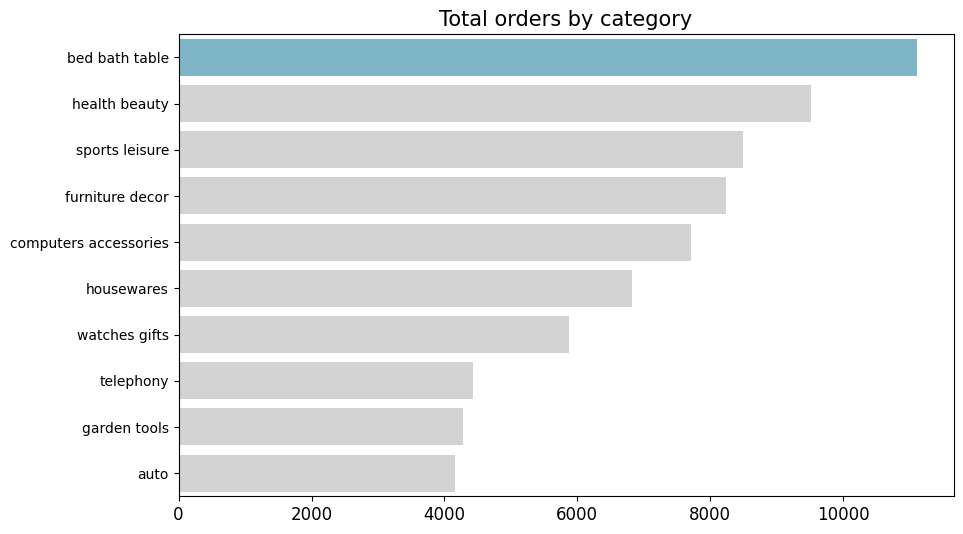

In [153]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    y="product_category_name", 
    x="Quantity",
    data=orders_category.sort_values(by='Quantity', ascending=False).head(10),
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue='product_category_name'
)
plt.title("Total orders by category", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

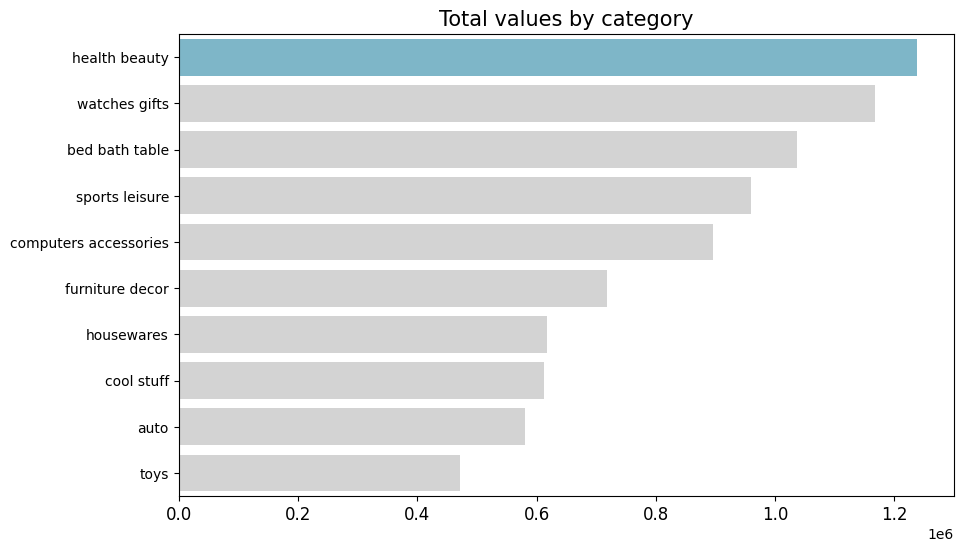

In [154]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    y="product_category_name", 
    x="Value",
    data=orders_category.sort_values(by='Value', ascending=False).head(10),
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue="product_category_name"
)
plt.title("Total values by category", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Bed Bath Table menjadi kategori yang paling sering di-order, tetapi Health Beauty menjadi penyumbang value transaksi terbanyak 

### Pertanyaan 3: Bagaimana performa penjual dan kontribusinya terhadap transaksi?

In [155]:
sellers_performance = all_df.groupby('seller_id').agg(
    order_count = ('order_id', 'nunique'),
    total_value = ('total_price', 'sum'),
    average_score = ('review_score', 'mean')
).reset_index()

sellers_performance

,seller_id,order_count,total_value,average_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,195,24487.03,4.046632
2,002100f778ceb8431b7a1020ff7ab48f,50,1236.50,4.036364
3,003554e2dce176b5555353e4f3555ac8,1,120.00,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,156,20324.20,4.153374
...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,27,1529.13,4.321429
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,2101.20,4.333333
2967,ffeee66ac5d5a62fe688b9d26f83f534,14,1839.86,4.214286
2968,fffd5413c0700ac820c7069d66d98c89,57,8535.00,3.892857


In [156]:
sellers_performance.sort_values('order_count', ascending=False).head(3)

,seller_id,order_count,total_value,average_score
1190,6560211a19b47992c3666cc44a7e94c0,1819,120983.82,3.956095
858,4a3ca9315b744ce9f8e9374361493884,1772,199408.32,3.846569
2388,cc419e0650a3c5ba77189a1882b7556a,1651,103152.56,4.151854


In [157]:
sellers_performance.sort_values('total_value', ascending=False).head(3)

,seller_id,order_count,total_value,average_score
834,4869f7a5dfa277a7dca6462dcf3b52b2,1124,226987.93,4.145519
982,53243585a1d6dc2643021fd1853d8905,348,217940.44,4.193642
858,4a3ca9315b744ce9f8e9374361493884,1772,199408.32,3.846569


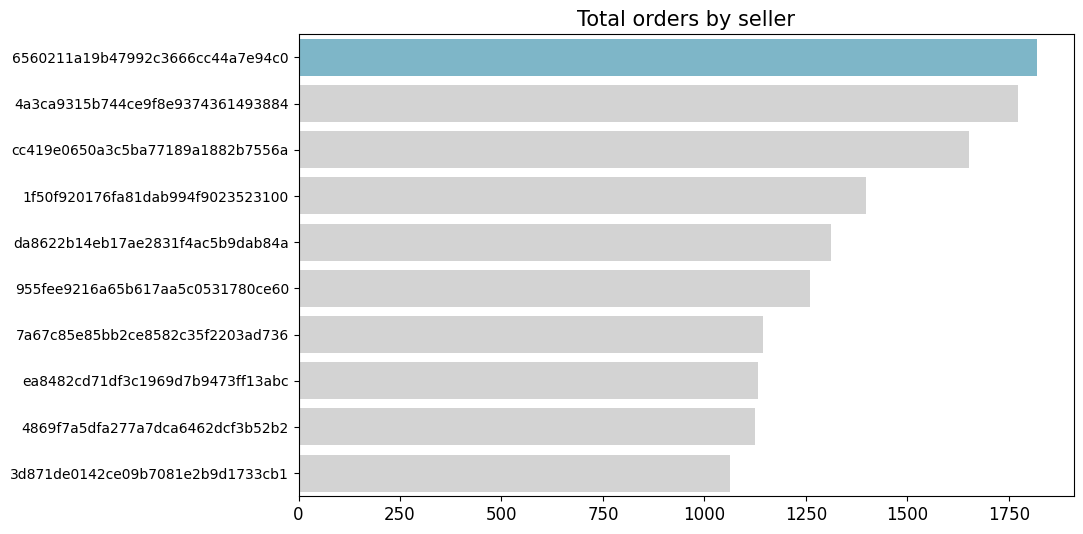

In [158]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    data=sellers_performance.sort_values(by='order_count', ascending=False).head(10),
    y="seller_id", 
    x="order_count",
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue="seller_id"
)
plt.title("Total orders by seller", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

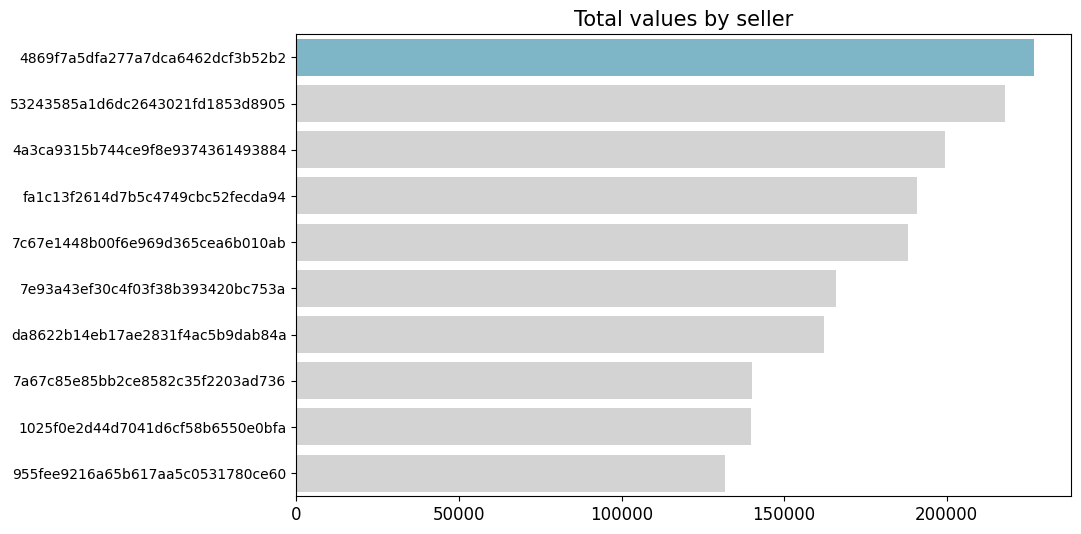

In [159]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    data=sellers_performance.sort_values(by='total_value', ascending=False).head(10),
    y="seller_id", 
    x="total_value",
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue= "seller_id"
)
plt.title("Total values by seller", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana perilaku dan demografi pelanggan yang kita miliki?

In [160]:
cust_city = all_df.groupby('customer_city').agg(customer_count=('customer_unique_id', 'nunique')).sort_values('customer_count', ascending=False).reset_index()
cust_city.head(10)

,customer_city,customer_count
0,sao paulo,14528
1,rio de janeiro,6361
2,belo horizonte,2606
3,brasilia,2013
4,curitiba,1434
5,campinas,1363
6,porto alegre,1292
7,salvador,1154
8,guarulhos,1111
9,sao bernardo do campo,881


In [161]:
cust_state = all_df.groupby('customer_state').agg(customer_count=('customer_unique_id', 'nunique')).sort_values('customer_count', ascending=False).reset_index()
cust_state.head(10)

,customer_state,customer_count
0,SP,39155
1,RJ,11917
2,MG,11001
3,RS,5168
4,PR,4769
5,SC,3449
6,BA,3158
7,DF,2019
8,ES,1928
9,GO,1895


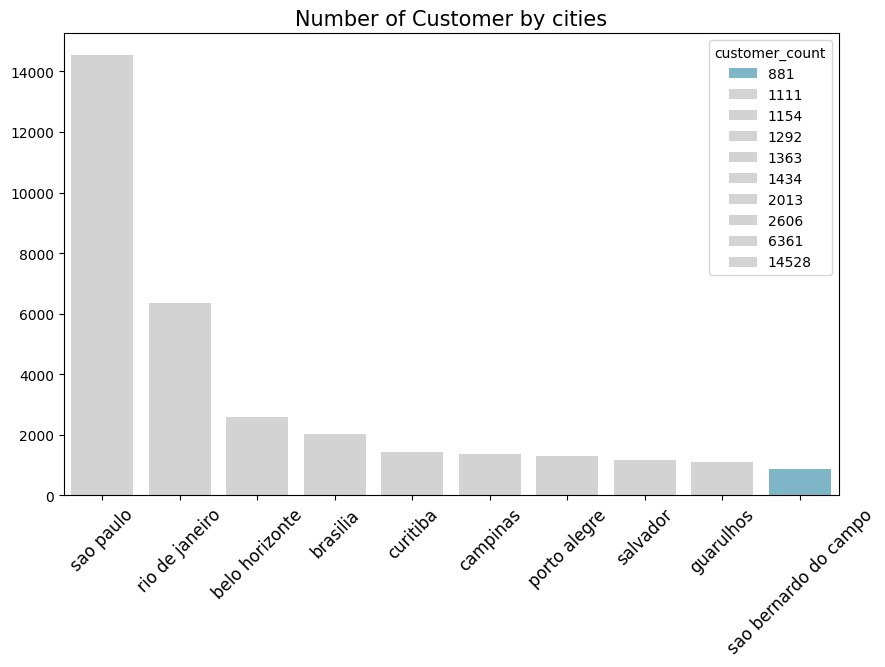

In [162]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    data=cust_city.head(10),
    y="customer_count", 
    x="customer_city",
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue="customer_count"
)
plt.title("Number of Customer by cities", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

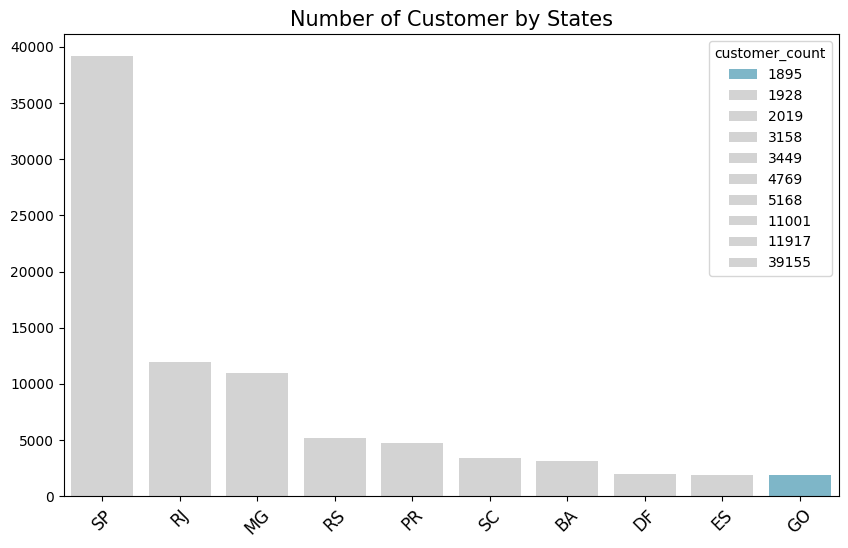

In [163]:
plt.figure(figsize=(10, 6))
 
sns.barplot(
    data=cust_state.head(10),
    y="customer_count", 
    x="customer_state",
    palette=["#72BCD4"] + ["#D3D3D3"]*9,
    hue="customer_count"
)
plt.title("Number of Customer by States", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=45)
plt.show()

### Analisis Lanjutan : RFM

#### Tabel RFM

In [164]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_timestamp = ("order_purchase_timestamp", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("total_price", "sum") # menghitung jumlah revenue yang dihasilkan
)

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = delivered_orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df = rfm_df[["customer_unique_id", "recency", "frequency", "monetary"]]

rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00
6,00050ab1314c0e55a6ca13cf7181fecf,131,1,27.99
7,00053a61a98854899e70ed204dd4bafe,182,1,382.00
8,0005e1862207bf6ccc02e4228effd9a0,543,1,135.00
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90


In [165]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93357 entries, 0 to 93356
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93357 non-null  object 
 1   recency             93357 non-null  int64  
 2   frequency           93357 non-null  int64  
 3   monetary            93357 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


#### Top Recency, Frequency, & Monetary

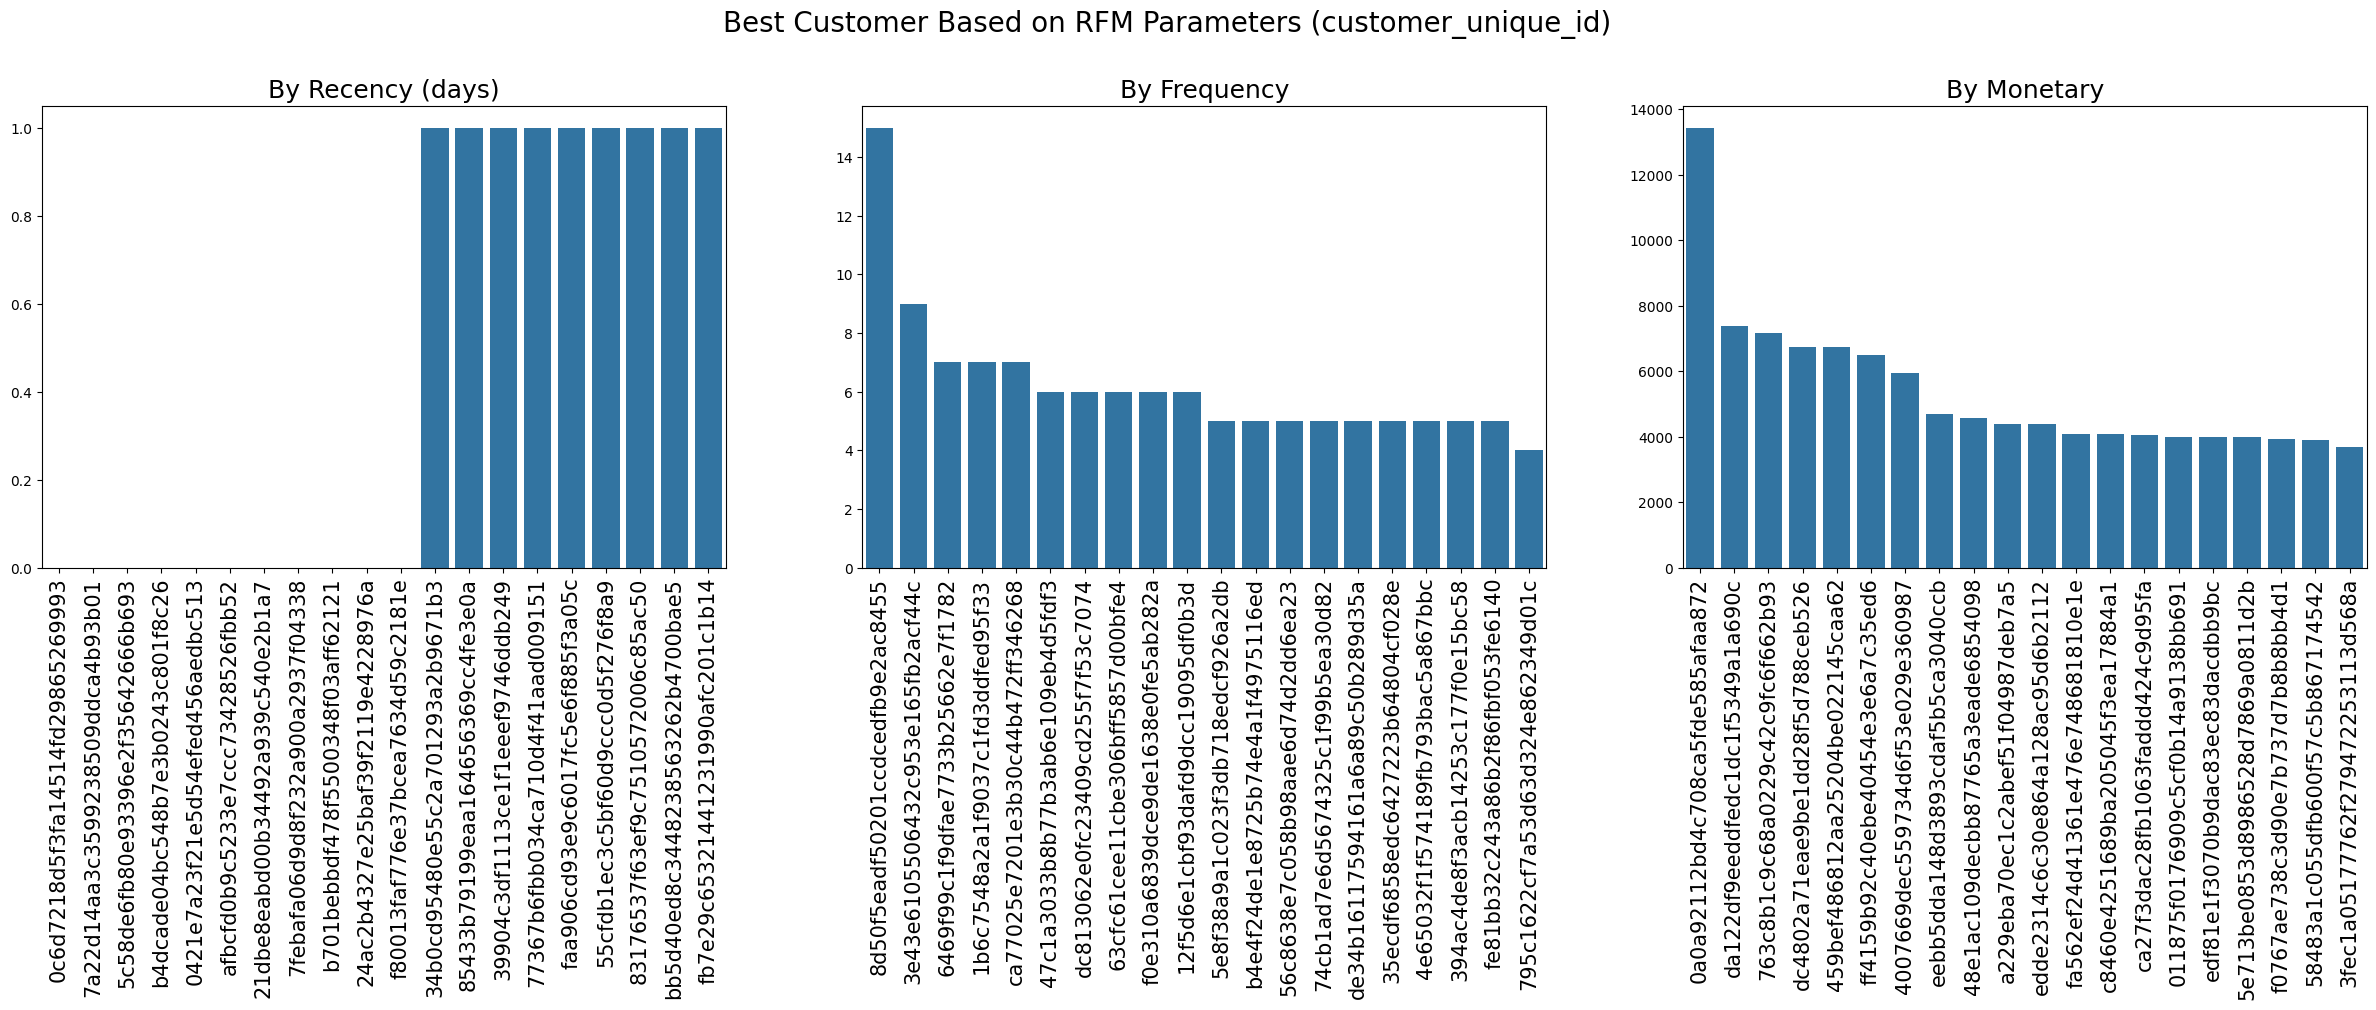

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

top_recency = rfm_df.sort_values(by="recency", ascending=True).head(20)
sns.barplot(
    y="recency", 
    x="customer_unique_id", 
    data=top_recency, 
    # order=rfm_df.sort_values(by="recency", ascending=True)["customer_unique_id"].head(20), 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

top_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(20)
sns.barplot(
    y="frequency", 
    x="customer_unique_id", 
    data=top_frequency, 
    # order=rfm_df.sort_values(by="frequency", ascending=False)["customer_unique_id"].head(20), 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis ='x', labelsize=15, rotation=90)

top_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(20)
sns.barplot(
    y="monetary", 
    x="customer_unique_id", 
    data=top_monetary, 
    # order=rfm_df.sort_values(by="monetary", ascending=False)["customer_unique_id"].head(20), 
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis ='x', labelsize=15, rotation=90)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20, y=1.04)
plt.show()

In [167]:
rfm_df.describe()


,recency,frequency,monetary
count,93357.000000,93357.000000,93357.000000
mean,237.473783,1.033420,142.246448
std,152.587935,0.209099,216.932390
min,0.000000,1.000000,0.850000
25%,114.000000,1.000000,47.800000
50%,218.000000,1.000000,89.900000
75%,346.000000,1.000000,155.000000
max,695.000000,15.000000,13440.000000


#### RFM Distribution

<Axes: >

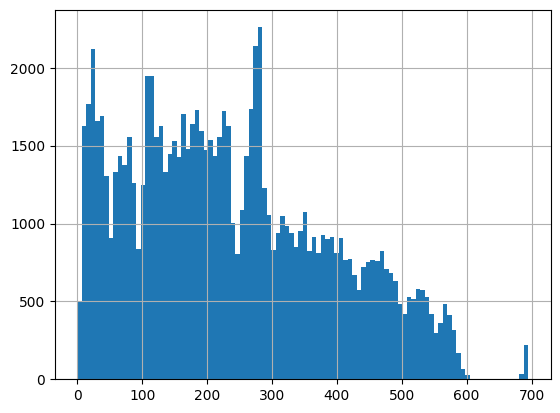

In [168]:
rfm_df['recency'].hist(bins=100)

<Axes: >

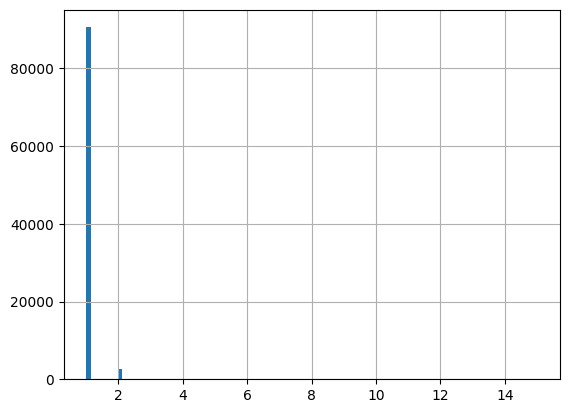

In [169]:
rfm_df['frequency'].hist(bins=100)

<Axes: >

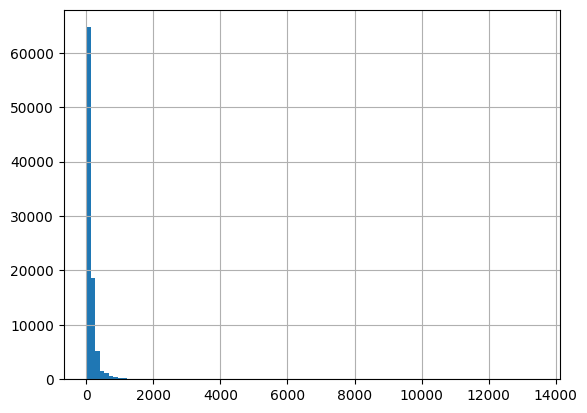

In [176]:
rfm_df['monetary'].hist(bins=100)

#### Scoring

In [ ]:
rfm_df['r_cat'] = rfm_df['recency'].apply(lambda x: 3 if x < 30 else 2 if x < 90 else 1)
rfm_df['f_cat'] = rfm_df['frequency'].apply(lambda x: 1 if x <= 1 else 2 if x <= 5 else 3)
rfm_df['m_cat'] = rfm_df['monetary'].apply(lambda x: 1 if x < rfm_df['monetary'].quantile(0.25) else 
                                           2 if x < rfm_df['monetary'].quantile(0.25) else 3)

rfm_df['score'] = rfm_df['r_cat']*0.2 + rfm_df['f_cat']*0.3 + rfm_df['m_cat']*0.5

rfm_df


,customer_unique_id,recency,frequency,monetary,r_cat,f_cat,m_cat,score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,1,1,3,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,1,1,1,1.0
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,3,2.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,3,2.0
...,...,...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3,2.0
93353,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,1,1,3,2.0
93354,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,3,2.0
93355,ffff5962728ec6157033ef9805bacc48,119,1,115.00,1,1,3,2.0


<Axes: >

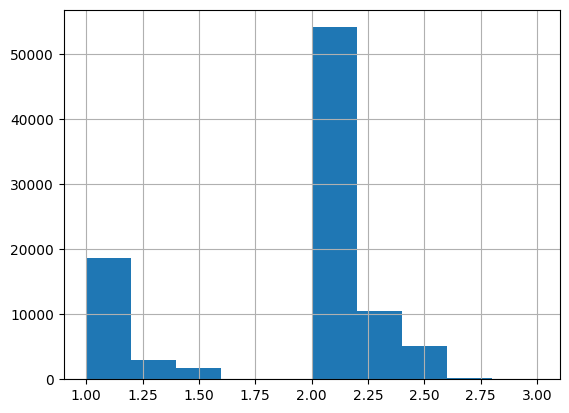

In [180]:
rfm_df['score'].hist()

#### Customer Segmentation

In [193]:
rfm_df['cust_segment'] = pd.cut(
    rfm_df['score'], 
    bins=(0.9, 1.4, 1.8, 2.2, 2.6, 3), 
    labels=('Lost Customers', 'At Risk Customers', 'Potential Loyalists', 'Loyal Customers', 'Best Customers')
)
rfm_df

,customer_unique_id,recency,frequency,monetary,r_cat,f_cat,m_cat,score,cust_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,1,1,3,2.0,Potential Loyalists
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,1,1,1,1.0,Lost Customers
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,3,2.0,Potential Loyalists
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,1.0,Lost Customers
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,3,2.0,Potential Loyalists
...,...,...,...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3,2.0,Potential Loyalists
93353,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,1,1,3,2.0,Potential Loyalists
93354,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,3,2.0,Potential Loyalists
93355,ffff5962728ec6157033ef9805bacc48,119,1,115.00,1,1,3,2.0,Potential Loyalists


In [208]:
cust_segment = rfm_df.groupby('cust_segment', as_index=False, observed=True).size()
cust_segment

,cust_segment,size
0,Lost Customers,21628
1,At Risk Customers,1698
2,Potential Loyalists,62589
3,Loyal Customers,7242
4,Best Customers,200


In [222]:
colors = ['#EF553B' if size in cust_segment.nlargest(2, 'size')['size'].values else '#636EFA' for size in cust_segment['size']]

fig = px.bar(cust_segment, 
             x='size', 
             y='cust_segment', 
             orientation='h', 
             title="Customer Segmentation Distribution",
             labels={'size': 'Number of Customers', 'cust_segment': 'Customer Segment'},
             )

fig.update_traces(marker_color=colors)
fig.show(config={'displayModeBar': False})

<!-- ## Save all_df -->

In [ ]:
all_df.drop('review_comment_message', axis=1, inplace=True)

*Saya mengalami kesulitan menangani delimeter yang terpengaruh oleh kolom ini, jadi saya akan menghapus kolom tersebut

In [ ]:
import csv
# all_df.to_csv("all_data.csv", index=False,quoting=csv.QUOTE_ALL)

## Conclusion

- Total Order dan Nilai Transaksi 
  - Untuk total order dan value seluruh periode berjumlah 96477 order dan R$ 15.489.522,09.  
  - Untuk total order dan value per hari dan bulan, bisa dilihat pada bagian explanatory analysis.  
  - Terdapat lonjakan pembelian yang besar pada 24 November 2017, kemungkinan ada event tertentu yang menyebabkan linjakan tersebut.

- Kategori Produk Terbaik
  - Lima teratas kategori produk paling populer yang sering di-order diantaranya:  
Bed bad table, health beauty, sports leisure, furniture decor, dan computer accessories  
  - Sedangkan lima teratas kategori produk yang paling berkontribusi terhadap nilai transaksi diantaranya:  
Health beauty, watches gifts, bed bad table, sports leisure, dan computer accessories

- Seller Terbaik

  - 3 seller terbaik berdasarkan jumlah order yang mencapai diatas 1500 order diantaranya adalah  
    - 6560211a19b47992c3666cc44a7e94c0 dengan 1819 order, value sebesar R$ 120.983,82, dan rata rata score 3.95
    - 4a3ca9315b744ce9f8e9374361493884 dengan 1772 order, value sebesar R$ 199.408,32, dan rata rata score 3.84
    - cc419e0650a3c5ba77189a1882b7556a dengan 1651 order, value sebesar R$ 103.152,56, dan rata rata score 4.15  

  - 3 seller terbaik berdasarkan jumlah pendapatan yang mencapai (dan mendekati) R$ 200.000 diantaranya adalah  
    - 4869f7a5dfa277a7dca6462dcf3b52b2 dengan value sebesar R$ 226987.93, 1124 order, dan rata rata score 4.14
    - 53243585a1d6dc2643021fd1853d8905 dengan value sebesar R$ 217940.44, hanya 348 order, dan rata rata score 4.19
    - 4a3ca9315b744ce9f8e9374361493884 dengan value sebesar R$ 199408.32, 1772 order, dan rata rata score 3.84

- Demografi pelanggan berdasarkan lokasi
  - Kota dengan pelanggan terbanyak
    - Sao Paulo, 14528 pelanggan
    - Rio de Janeiro, 6361 pelanggan
    - Belo Horizonte, 2606 pelanggan
  - Negara bagian dengan pelanggan terbanyak
    - Sao Paulo, 39155 pelanggan
    - Rio de Janeiro, 11917 pelanggan
    - Minas Gerais, 11001  
  - Perbedaan signifikan pelanggan di masing-masing negara bagian dan kota  dapat dipengaruhi oleh beberapa faktor seperti kepadatan penduduk, sektor ekonomi utama, daya beli, dan tingkat urbanisasi. Bisa dilakukan analisis lanjutan untuk tiap negara bagian dan kota

- x
